In [1]:
import dgl # huggingface 같은 라이브러리
import torch
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from stgraph_trainer.datasets import *
from stgraph_trainer.trainers import RNNTrainer
from stgraph_trainer.utils import save_figure_predict
from stgraph_trainer.utils import matplotlib_plot_font
from stgraph_trainer.models import STGCN_WAVE

import scipy.sparse as sp
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import os
from stgraph_trainer.models import GRU, LSTM
print(os.getcwd())

matplotlib_plot_font()
# device = torch.device("mps")
device = torch.device("cpu")


# from matplotlib import font_manager, rc
# font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc'
# font = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family = font)

/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using TensorFlow backend.


/Users/jeonjunhwi/문서/Projects/Master_GNN/Code


In [2]:
def seq_data(data,sequence_length):
    x_seq = []
    y_seq = []
    for i in range(len(data) - sequence_length):
        x_seq.append(data[i:i+sequence_length])
        y_seq.append(data[i+sequence_length])
        # print(y_seq)
    return torch.FloatTensor(x_seq).to(device), torch.FloatTensor(y_seq).to(device).view(-1, 1)

def evaluate_metric(model, data_iter):
    model.eval()
    with torch.no_grad():
        mae, mape, mse = [], [], []
        for x, y in data_iter:
            #y = y.cpu().numpy().reshape(-1)
            y_pred = model(x).view(len(x), -1).cpu().numpy()#.reshape(-1)
            d = np.abs(y - y_pred)
            mae += d.tolist()
            mape += (d / y).tolist()
            mse += (d ** 2).tolist()
        MAE = np.array(mae).mean()
        MAPE = np.array(mape).mean()
        RMSE = np.sqrt(np.array(mse).mean())
        return MAE, MAPE, RMSE
    
def seed_everything(seed = 42):
    import random
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    print(f'Seed set = {seed}')
    
seed_everything()

Seed set = 42


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:110: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:122: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 0.9949 val_loss : 8.9031
[epoch : 0] train_loss : 1.0109 val_loss : 9.4628


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:110: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:122: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0047 val_loss : 10.2725
[epoch : 0] train_loss : 1.0029 val_loss : 10.5854


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:110: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:122: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 0.9691 val_loss : 13.6093
[epoch : 0] train_loss : 1.0045 val_loss : 14.9934


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:110: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:122: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0100 val_loss : 6.8546
[epoch : 0] train_loss : 1.0055 val_loss : 6.9137


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:110: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:122: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0205 val_loss : 0.9598
[epoch : 0] train_loss : 1.0165 val_loss : 0.9733


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:110: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:122: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 0.9955 val_loss : 5.5597
[epoch : 0] train_loss : 1.0189 val_loss : 5.7312


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:110: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:122: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0109 val_loss : 12.1992
[epoch : 0] train_loss : 1.0101 val_loss : 12.3300


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:110: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:122: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0190 val_loss : 8.6881
[epoch : 0] train_loss : 1.0022 val_loss : 8.8047


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:110: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:122: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0072 val_loss : 7.1608
[epoch : 0] train_loss : 1.0153 val_loss : 7.1871


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:110: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:122: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0100 val_loss : 5.0458
[epoch : 0] train_loss : 1.0164 val_loss : 5.1554


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:110: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:122: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0020 val_loss : 5.2704
[epoch : 0] train_loss : 1.0251 val_loss : 5.3274


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:110: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:122: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0047 val_loss : 3.7075
[epoch : 0] train_loss : 1.0152 val_loss : 3.7723


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:110: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:122: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 0.9991 val_loss : 4.1647
[epoch : 0] train_loss : 1.0115 val_loss : 4.3466


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:110: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:122: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 0.9987 val_loss : 2.3817
[epoch : 0] train_loss : 1.0179 val_loss : 2.4836


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:110: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:122: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0033 val_loss : 2.2528
[epoch : 0] train_loss : 1.0142 val_loss : 2.2863


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:110: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:122: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 0.9905 val_loss : 1.3156
[epoch : 0] train_loss : 1.0079 val_loss : 1.3688


/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:110: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/opt/anaconda3/envs/venvGNN/lib/python3.7/site-packages/ipykernel_launcher.py:122: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


[epoch : 0] train_loss : 1.0143 val_loss : 3.9828
[epoch : 0] train_loss : 1.0117 val_loss : 4.0465


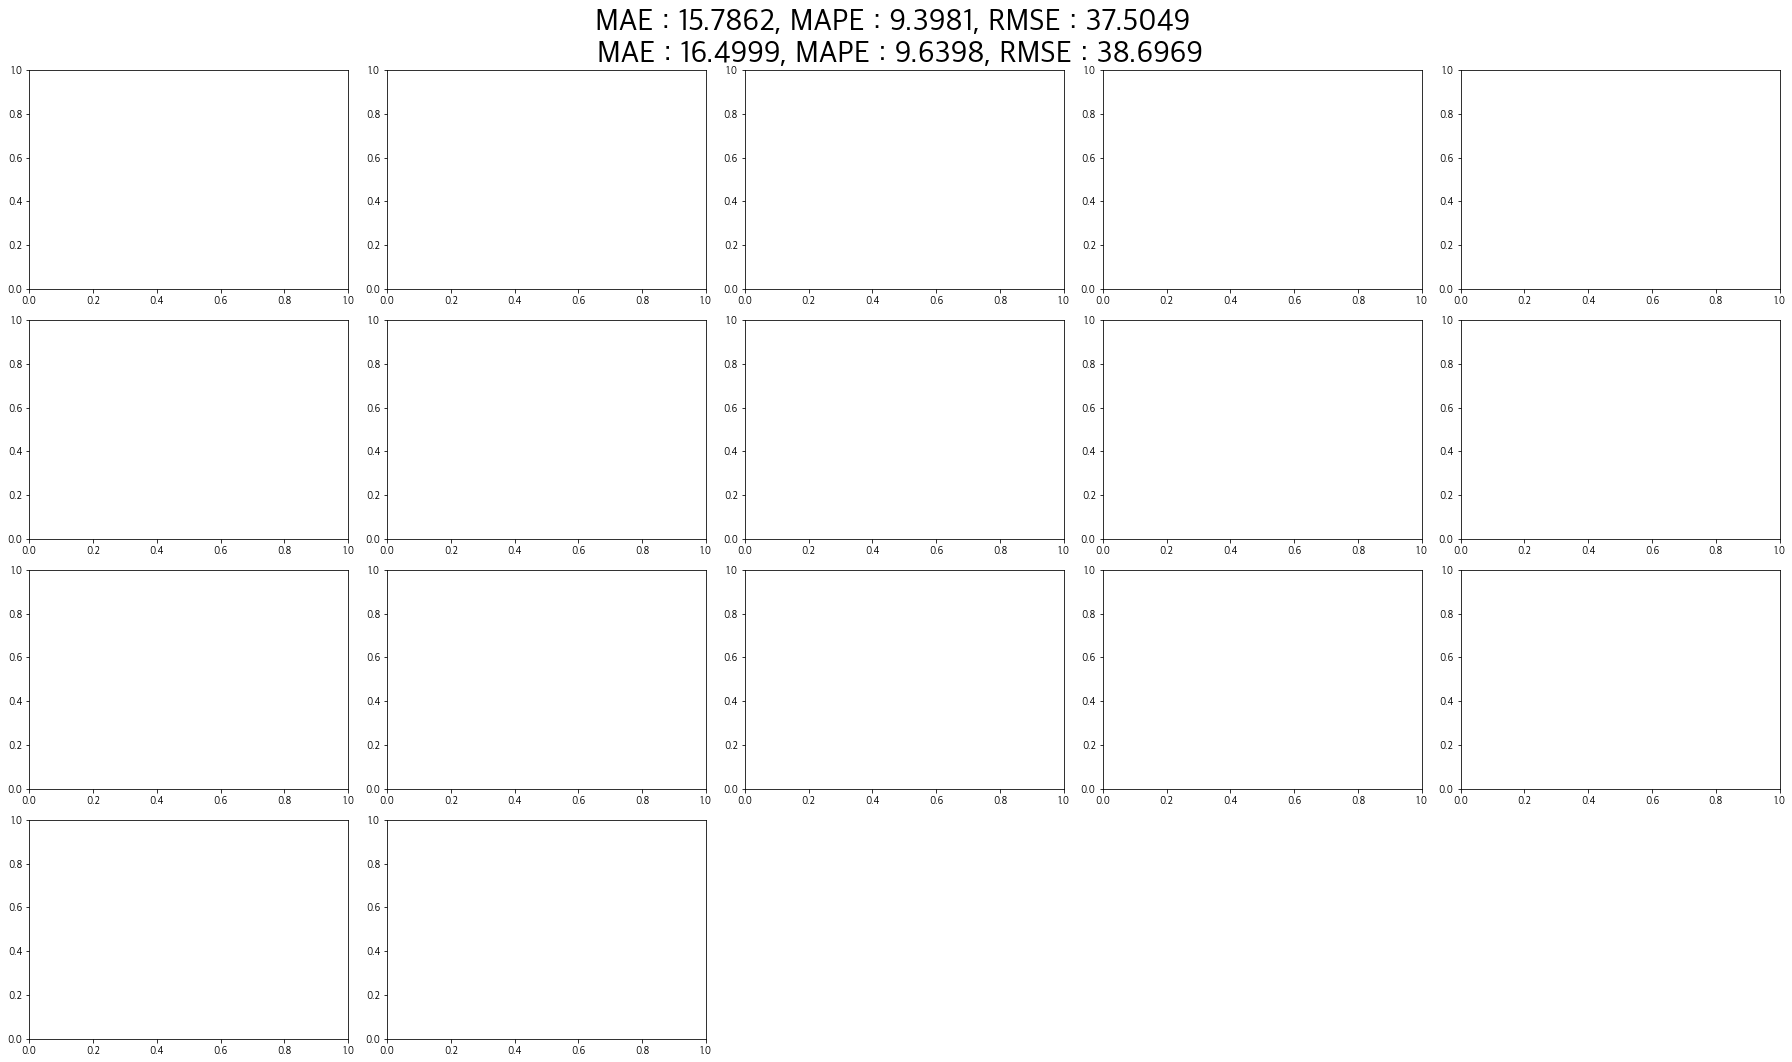

In [7]:
##################
## Load Dataset ##
##################

region_type = 'state'
df2 = pd.read_csv(f'/Users/jeonjunhwi/문서/Projects/Master_GNN/Data/KCDC_data/Processing_Results/smoothing_3_{region_type}_mean.csv', index_col=0, encoding='cp949')

df = df2.iloc[100:686] # 12월 까지만 해보자
df2 = df2.iloc[100:686] # 아래쪽 plot을 위해서 저장해준 원래부분, 깔끔하게 바꾸자

df = df.diff()
df = df.iloc[1:, :]


### 컬럼을 숫자로 바꿔줌 ###
# region_dict = {}
# for i, region in enumerate(df.columns):
#     region_dict[i] = region
# df.columns = list(region_dict.keys())

############################################
## train, test, validation length setting ##
############################################

len_val = int(df.shape[0] * 0.2)
len_test = 19
len_train = df.shape[0] - len_val - len_test

train = df.iloc[: len_train,:]
val = df.iloc[len_train: len_train + len_val,:]
test = df.iloc[len_train + len_val:len_train + len_val + len_test,:]

save_GRU = pd.DataFrame({})
save_LSTM = pd.DataFrame({})
fig = plt.figure(figsize=(25,15), facecolor='white')
true_df2 = []
pred_1_list = []
pred_2_list = []

############################
## Hyperparameter Setting ##
############################

suptitle_1 = 'Standard Scaler, GRU'
suptitle_2 = 'Standard Scaler, LSTM'
epochs = 50
batch_size = 16
num_layers = 2
hidden_size = 32
output_size = 32
sequence_length = 5
learning_rate = 1e-3
criterion = nn.MSELoss()

# for i in [0]:
for i, region in enumerate(df.columns):
    
    #######################
    ## Define DataLoader ##
    #######################
    
    train = df[[region]][:len_train]
    val = df[[region]][ len_train: len_train + len_val]
    test = df[[region]][ len_train + len_val:]
    
    scaler = StandardScaler()

    train = scaler.fit_transform(train)
    val = scaler.transform(val)
    test = scaler.transform(test)

    x_train_seq, y_train_seq = seq_data(train, sequence_length)
    x_val_seq, y_val_seq = seq_data(val, sequence_length)
    x_test_seq, y_test_seq = seq_data(test, sequence_length)

    train_torch = torch.utils.data.TensorDataset(x_train_seq, y_train_seq)
    val_torch = torch.utils.data.TensorDataset(x_val_seq, y_val_seq)
    test_torch = torch.utils.data.TensorDataset(x_test_seq, y_test_seq)
    
    train_loader = torch.utils.data.DataLoader(dataset=train_torch, batch_size=batch_size, shuffle=True)
    val_loader = torch.utils.data.DataLoader(dataset=val_torch, batch_size=batch_size, shuffle=False)
    test_loader = torch.utils.data.DataLoader(dataset=test_torch, batch_size=batch_size, shuffle=False)

    save_path_1 = f"save_model/gru_smooth_3_{suptitle_1}_{i}.pt"
    save_path_2 = f"save_model/lstm_smooth_3_{suptitle_2}_{i}.pt"
    
    ############################
    ## Define Model and Train ##
    ############################
    
    model_1 = GRU(input_size = x_train_seq.size(2), # x_train_seq.size() : [train_days, time_steps, channel]
                    hidden_size = hidden_size,
                    sequence_length = sequence_length,
                    num_layers = num_layers,
                    device = device).to(device)
    
    model_2 = LSTM(input_size = x_train_seq.size(2),
                    hidden_size = hidden_size,
                    sequence_length = sequence_length,
                    num_layers = num_layers,
                    device = device).to(device)
    
    optimizer_1 = optim.Adam(model_1.parameters(), lr=learning_rate)
    optimizer_2 = optim.Adam(model_2.parameters(), lr=learning_rate)
    
    trainer_1 = RNNTrainer(model=model_1,
                        train_loader=train_loader,
                        val_loader=val_loader,
                        # test_loader=test_loader,
                        test_loader=torch.tensor(x_test_seq, dtype=torch.float32), # x_test
                        loss=criterion,
                        optimizer=optimizer_1,
                        scaler=scaler,
                        device=device,
                        save_path=save_path_1,
                        raw_test=df2.iloc[-(len_test + 1)+ sequence_length:,i].values)

    trainer_2 = RNNTrainer(model=model_2,
                        train_loader=train_loader,
                        val_loader=val_loader,
                        # test_loader=test_loader,
                        test_loader=torch.tensor(x_test_seq, dtype=torch.float32), # x_test
                        loss=criterion,
                        optimizer=optimizer_2,
                        scaler=scaler,
                        device=device,
                        save_path=save_path_2,
                        raw_test=df2.iloc[-(len_test + 1)+ sequence_length:,i].values)
    
    val_loss_1, epoch_1 = trainer_1.train(epochs)
    val_loss_2, epoch_2 = trainer_2.train(epochs)
    pred_1 = trainer_1.predict(df.shape[1])
    pred_2 = trainer_2.predict(df.shape[1])

    #######################
    ## Calculate Metrics ##
    #######################
    
    true_df2+= df2.iloc[-len_test + sequence_length:,i].tolist()
    pred_1_list += list(pred_1)
    pred_2_list += list(pred_2)
    
    # df2를 다 머지하고, pred_1도 다 머지하고
    from stgraph_trainer.utils import compute_metrics
    RMSE_GRU, RMSE_total_GRU = compute_metrics(df2.iloc[-len_test + sequence_length:,i], pred_1, metric='rmse')
    MAE_GRU, MAE_total_GRU = compute_metrics(df2.iloc[-len_test + sequence_length:,i], pred_1, metric='mae')
    MAPE_GRU, MAPE_total_GRU = compute_metrics(df2.iloc[-len_test + sequence_length:,i], pred_1, metric='mape')
    
    RMSE_LSTM, RMSE_total_LSTM = compute_metrics(df2.iloc[-len_test + sequence_length:,i], pred_2, metric='rmse')
    MAE_LSTM, MAE_total_LSTM = compute_metrics(df2.iloc[-len_test + sequence_length:,i], pred_2, metric='mae')
    MAPE_LSTM, MAPE_total_LSTM = compute_metrics(df2.iloc[-len_test + sequence_length:,i], pred_2, metric='mape')
    
    ##########################
    ## Original Data Figure ##
    ##########################

    save_GRU[region] = pred_1
    save_LSTM[region] = pred_2
        
    # ax1 = fig.add_subplot(4,5,int(i)+1)
    
    

    # for num in range(ceil(y_pred.shape[1]/20)):
    # fig = plt.figure(figsize=(25,15), facecolor='white')
    
    # 20개 이상인 지역들을 다른 figure에 plot 하기 위해 범위를 나눠줌
    # if i == 0: # city
    if i == 1: # state
        range_ = range(20)
    elif 20*(i+1) > len(df.columns): # 마지막이 20의 배수보다 작으면
        range_ = range(20*i, len(df.columns))
    else:
        range_ = range(20*i, 20*(i+1))
    # print(y_pred.shape[1])
    # for j in range_: # 17 도시에 대해서 각 도, 66개 수도권 시군구에 대해서 시군구
    if i<20:
        ax1 = fig.add_subplot(4,5,i+1)
    elif i<40:
        ax1 = fig.add_subplot(4,5,i-19)
    elif i<60:
        ax1 = fig.add_subplot(4,5,i-39)
    elif i<80:
        ax1 = fig.add_subplot(4,5,i-59)
    elif i<100:
        ax1 = fig.add_subplot(4,5,i-79)
    elif i<120:
        ax1 = fig.add_subplot(4,5,i-99)
    elif i<140:
        ax1 = fig.add_subplot(4,5,i-119)
    elif i<160:
        ax1 = fig.add_subplot(4,5,i-139)
    elif i<180:
        ax1 = fig.add_subplot(4,5,i-159)
    elif i<200:
        ax1 = fig.add_subplot(4,5,i-179)
    elif i<220:
        ax1 = fig.add_subplot(4,5,i-199)
    elif i<240:
        ax1 = fig.add_subplot(4,5,i-219)
    
    
    
        ax1.plot(df2.iloc[-len_test + sequence_length:,i].values,'--')
        ax1.plot(pred_1,'b',linewidth=0.6)
        ax1.plot(pred_2,'k',linewidth=0.6)
        ax1.legend(['actual', 'GRU', 'LSTM'])
        
        xlabels = [i[5:] for i in list(df2.index[-len_test + sequence_length:])]
        ax1.set_xticks(ticks = [i for i in range(len(xlabels))], labels = xlabels, rotation=90)
        yticks_ = ax1.get_yticks()
        ax1.set_yticks(yticks_, fontsize = 15)
        
        # title_ = f"{region} \n MAE: {MAE_GRU.item():.4f},RMSE: {RMSE_GRU.item():.4f}, gru_loss: {val_loss_1:.4f}, gru_epoch : {epoch_1} \n MAE: {MAE_LSTM.item():.4f},RMSE: {RMSE_LSTM.item():.4f}, gru_loss: {val_loss_1:.4f}, gru_epoch : {epoch_1}"
        title_ = 'Region : {} \n GRU, MAE : {:.4f}, RMSE : {:.4f}, loss : {:.4f}, epoch : {:.4f} \n  LSTM, MAE : {:.4f}, RMSE : {:.4f}, loss : {:.4f}, epoch : {:.4f}'
        title_ = title_.format(region,
                            MAE_GRU.item(),RMSE_GRU.item(),val_loss_1,epoch_1,
                            MAE_LSTM.item(),RMSE_LSTM.item(),val_loss_2,epoch_2
                            )
        ax1.set_title(title_ ,fontsize = 13)
    

#################
## Save Figure ##
#################
true_df2 = np.array(true_df2).reshape(-1,)
pred_1_list = np.array(pred_1_list).reshape(-1,)
pred_2_list = np.array(pred_2_list).reshape(-1,)

_, RMSE_avg_GRU = compute_metrics(true_df2, pred_1_list, metric='rmse')
_, MAE_avg_GRU = compute_metrics(true_df2, pred_1_list, metric='mae')
_, MAPE_avg_GRU = compute_metrics(true_df2, pred_1_list, metric='mape')

_, RMSE_avg_LSTM = compute_metrics(true_df2, pred_2_list, metric='rmse')
_, MAE_avg_LSTM = compute_metrics(true_df2, pred_2_list, metric='mae')
_, MAPE_avg_LSTM = compute_metrics(true_df2, pred_2_list, metric='mape')

suptitle = f"MAE : {MAE_avg_GRU:.4f}, MAPE : {MAPE_avg_GRU:.4f}, RMSE : {RMSE_avg_GRU:.4f} \n MAE : {MAE_avg_LSTM:.4f}, MAPE : {MAPE_avg_LSTM:.4f}, RMSE : {RMSE_avg_LSTM:.4f}"
fig.suptitle(suptitle, fontsize=30)
fig.tight_layout()
fig.savefig(f'Result/Figures/compare_rnn_original_{region_type}.png')

#####################
## Save Prediction ##
#####################

save_GRU['신고일'] = df2.index[-len_test + sequence_length:]
save_GRU.set_index('신고일', inplace=True)
save_GRU.to_csv(f'Result/pred/pred_GRU_{region_type}.csv', encoding='cp949')
save_LSTM['신고일'] = df2.index[-len_test + sequence_length:]
save_LSTM.set_index('신고일', inplace=True)
save_LSTM.to_csv(f'Result/pred/pred_LSTM_{region_type}.csv', encoding='cp949')